# AI/Machine Learning Implementation
📘 **Interactive Version**: For a hands-on experience with this chapter's content, access the interactive notebook in [Google Colab](https://drive.google.com/file/d/1OsVukpWf2-oUD0sr7xOI1UZ0cJVt8lvE/view?usp=sharing).

In this section, we delve into the practical application of prominent AI and machine learning algorithms using the datasets curated in the preceding chapters. While an exhaustive theoretical comprehension isn't mandatory, a foundational grasp of the underlying principles and confidence in their basic implementation will be advantageous.
The main task focus on this chapter will be classification because we are doing surface discrimination . We will come across regression in future chapters.

## Loading the data
From the previous notebook, you should have your training and testing data ready from this code:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
save_path = '/content/drive/MyDrive/Week 2/Week2_AI_Algorithms'

In [ ]:
import os
import numpy as np
X_train = np.load(os.path.join(save_path, 'X_train_balanced.npy'))
X_test = np.load(os.path.join(save_path, 'X_test_balanced.npy'))
y_train = np.load(os.path.join(save_path, 'y_train_balanced.npy'))
y_test = np.load(os.path.join(save_path, 'y_test_balanced.npy'))

## Convolutional Neural Networks (CNN)

### Introduction to CNNs

Convolutional Neural Networks, commonly known as CNNs, are a class of deep neural networks specially designed to process data with grid-like topology, such as images {cite}`Goodfellow-et-al-2016,lecun2015deep`. Originating from the visual cortex's biological processes, CNNs are revolutionising the way we understand and interpret visual data.

### Why CNN for Image Data?

Traditional neural networks, when used for images, suffer from two main issues:

- **Too many parameters**: For a simple 256x256 colored image, an input layer would have \(256 * 256 * 3 = 196,608\) neurons, leading to an enormous number of parameters even in the first hidden layer.
- **Loss of spatial information**: Flattening an image into a vector for traditional neural networks can lose the spatial hierarchies and patterns in the image, which are often crucial for understanding and interpreting visual data.

CNNs address both issues by introducing convolutions.

### Key Components of CNN

1. **Convolutional Layer** {cite}`lecun2015deep`: This is the core building block of a CNN. It slides a filter (smaller in size than the input data) over the input data (like an image) to produce a feature map or convolved feature. The primary purpose of a convolution is to extract features from the input data.
2. **Pooling Layer**: Pooling layers are used to reduce the dimensions of the feature maps, thereby reducing the number of parameters and computation in the network. The most common type of pooling is max pooling.
3. **Fully Connected Layer**: After several convolutional and pooling layers, the final classification is done using one or more fully connected layers. Neurons in a fully connected layer have connections to all activations in the previous layer, as seen in regular neural networks.
4. **Activation Functions**: Non-linearity is introduced into the CNN using activation functions. The Rectified Linear Unit (ReLU) is the most commonly used activation function in CNNs.

### How CNNs Learn Spatial Hierarchies

CNNs learn spatial hierarchies automatically. The initial layers might learn to detect edges, the next layers learn to detect shapes by combining edges, further layers might detect more complex structures. This ability to learn spatial hierarchies from raw data gives CNNs their power. It allows them to detect complex objects in images by combining simpler features from the earlier layers.

### Advantages of CNNs

- **Parameter Sharing**: A feature detector (filter) that's useful in one part of the image can be useful in another part of the image {cite}`krizhevsky2012imagenet`.
- **Sparsity of Connections**: In each layer, each output value depends only on a small number of input values, making the computation more efficient.

### Basic Code Implementation

Below, you'll find a basic Convolutional Neural Network (CNN) structure implemented in TensorFlow. Treat this as a foundational blueprint for your subsequent implementations.



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(3, 3, 21), padding='SAME'))
model.add(layers.MaxPooling2D((2, 2)))
# Add additional convolutional and pooling layers as needed
# ...

# Add dense layers for classification
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 is the number of classes

# Compile and train the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10,
        validation_split=0.1)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


501/501 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5162 - loss: 0.8582 - val_accuracy: 0.5971 - val_loss: 0.6613
Epoch 2/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6070 - loss: 0.6584 - val_accuracy: 0.6476 - val_loss: 0.6162
Epoch 3/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6398 - loss: 0.6318 - val_accuracy: 0.6554 - val_loss: 0.5913
Epoch 4/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6624 - loss: 0.6094 - val_accuracy: 0.6992 - val_loss: 0.5622
Epoch 5/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6873 - loss: 0.5753 - val_accuracy: 0.7211 - val_loss: 0.5313
Epoch 6/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6981 - loss: 0.5611 - val_accuracy: 0.7660 - val_loss: 0.5126
Epoch 7/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7407 - loss: 0.5149 - val_accuracy: 0.8042 - val_loss: 0.4524
Epoch 8/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7652 - loss: 0.4868 - val_accuracy: 0.8238 - val_

In [ ]:
# Save the trained model
model.save('/content/drive/MyDrive/GEOL0069/2324/Week_2/modelCNN.h5')  # Save as HDF5 file

# Load the model
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/GEOL0069/2324/Week_2/modelCNN.h5')


You can display the loss/accuracy curve using the code below



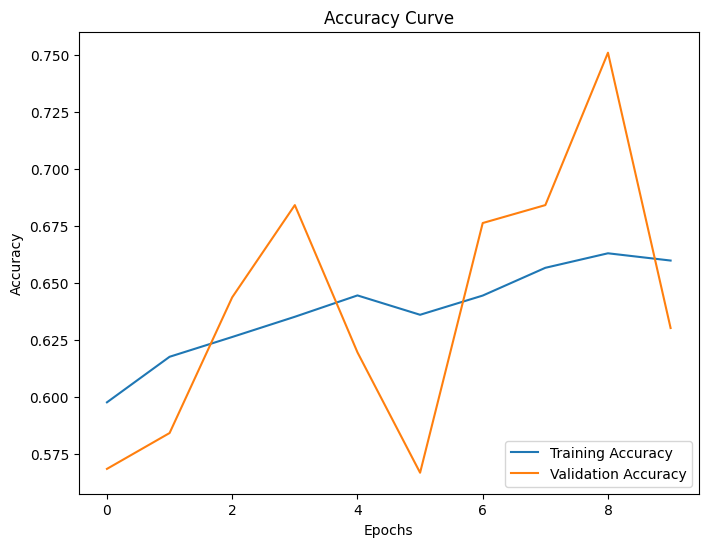

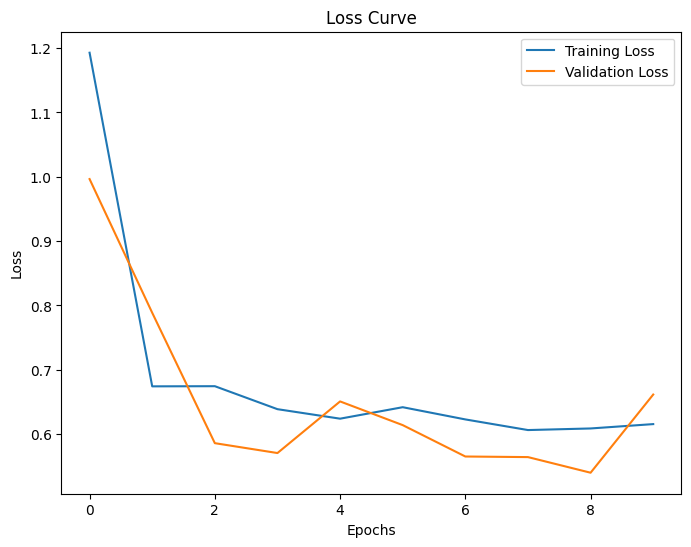

In [ ]:
import matplotlib.pyplot as plt


# Plot the loss and accuracy curves
def plot_training_curves(history):
    # Extract values from the history object
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    # Plot accuracy
    plt.figure(figsize=(8, 6))
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

    # Plot loss
    plt.figure(figsize=(8, 6))
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

# Call the function to plot the curves
plot_training_curves(history)


You can also display its performance using a confusion matrix

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


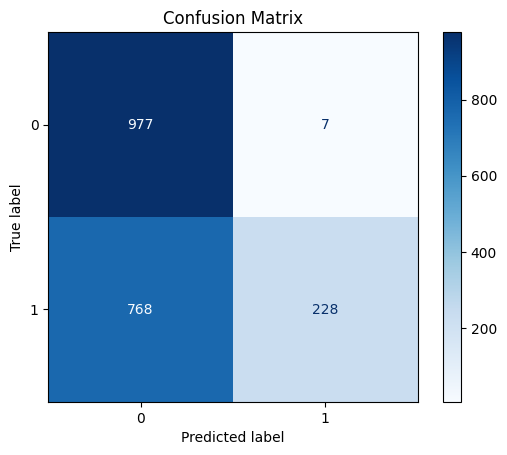

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Use the unique class labels from y_test
unique_labels = sorted(set(y_test))

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


## Random Forests

Random Forest is a notable and significant part of machine learning and is commonly used for classification. It can also be used for regression, but its application in classification is more prevalent. Decision Trees are the core components of a Random Forest, so let's delve into the concepts of Decision Trees {cite}`breiman2001random,quinlan1986induction`.

### Theoretical Foundations

### 1. **Ensemble Learning**

Ensemble methods employ multiple learning algorithms to achieve better predictive performance than any individual learning algorithm alone {cite}`dietterich2000ensemble`. The primary principle behind ensemble models is that several weak learners come together to form a strong learner.

### 2. **Decision Trees**

Decision trees are central to a Random Forest. They split data into subsets based on feature values, recursively producing a decision tree {cite}`quinlan1986induction`.

### 3. **Bootstrap Aggregating (Bagging)**

Random Forests leverage bagging, where multiple dataset subsets are created by drawing samples with replacement. A separate decision tree is built for each of these samples {cite}`breiman1996bagging`.

### 4. **Feature Randomness**

In conventional decision trees, the best feature is chosen to split data at every node. However, Random Forests introduce randomness by selecting a random set of features, then choosing the best split from this subset, ensuring a diverse ensemble of trees.


### Advantages

- **Generalisation**: By combining the predictions of multiple trees, Random Forests tend to generalize better and are less susceptible to overfitting on training data.
  
- **Parallel Processing**: Each decision tree can be built independently, allowing for parallel processing which speeds up the algorithm considerably for large datasets.

- **Handling Missing Values**: Random Forests can handle missing values and still produce reasonable predictions.

- **Importance Scoring**: They provide an importance score for each feature, aiding in feature selection or interpretability.

### Implementation in Python (Using Scikit-learn)



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialise the model with n_estimators specifying the number of trees in the forest
clf = RandomForestCl8assifier(n_estimators=100)

# We need to reshape the data in order to be compatible with Random Forest
X_reshaped = np.reshape(X_train, (X_train.shape[0], -1))
# Fit the model to your training data
clf.fit(X_reshaped, y_train)

# Predict the classes of the test data
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], -1))
y_pred = clf.predict(X_test_reshaped)

You can also display its performance using a confusion matrix

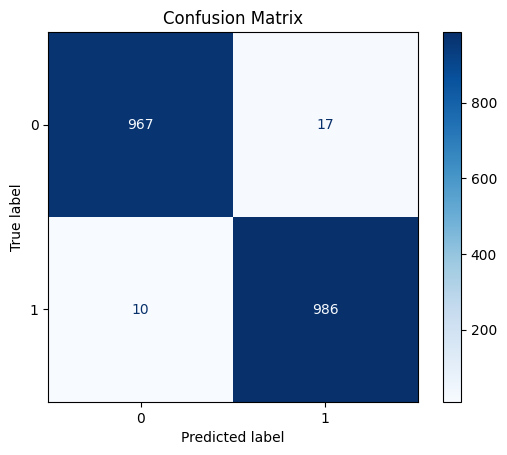

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(set(y_test)))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


You can also save and load the random forest model using the code below. (Don't forget to change the path to save and load.)

In [ ]:
import joblib

# Specify the directory and file name where you want to save the model
file_path = '/content/drive/MyDrive/Week 2/Week2_AI_Algorithms/random_forest_model.pkl'

# Save the model to the specified path
joblib.dump(clf, file_path)
print(f"Model saved at: {file_path}")


Model saved at: /content/drive/MyDrive/Week 2/Week2_AI_Algorithms/random_forest_model.pkl


In [ ]:
# Load the model from the file
loaded_model = joblib.load('/content/drive/MyDrive/Week 2/Week2_AI_Algorithms/random_forest_model.pkl')
print("Model loaded successfully.")

# Use the loaded model to make predictions
y_pred_loaded = loaded_model.predict(X_test_reshaped)


Model loaded successfully.


## Vision Transformer (ViT)

Vision Transformers (ViTs) are a recent breakthrough in the field of deep learning for image processing. They depart from the traditional convolutional neural network (CNN) approach and apply transformers, which were originally designed for natural language processing tasks, to image classification.

### Theoretical Foundations

### 1. **Tokenisation of Images**

Instead of processing images using convolutions, ViTs divide the image into fixed-size patches, linearly embed them, and then process the resulting sequence of vectors (or tokens) using a transformer.{cite}`dosovitskiy2020image`

### 2. **Position Embeddings**

Since the original transformer doesn't have a notion of the relative positions of tokens, positional embeddings are added to the patch embeddings to retain the positional information.{cite}`dosovitskiy2020image`

### 3. **Transformer Architecture**

The core of ViT is the transformer architecture, which consists of multiple layers of multi-head self-attention mechanisms and feed-forward neural networks.{cite}`dosovitskiy2020image`

### 4. **Classification Head**

After processing through the transformer layers, the embedding of the first token (often referred to as the 'CLS' token) is used to classify the image.{cite}`dosovitskiy2020image`

### Advantages of ViT

- **Model Transferability**: ViTs pre-trained on large datasets can be fine-tuned on smaller datasets, achieving high performance even when the available labeled data is limited.

- **Scalability**: ViTs are more data-hungry compared to CNNs. However, their performance continues to improve as the model size and the amount of data increase, often surpassing other architectures.

- **Flexibility**: The transformer architecture isn't specialized for grid-like data (like images), making ViTs potentially more flexible for varied input data types.

### Challenges

- **Computational Demand**: ViTs can be computationally intensive, especially when dealing with large images or when the model has many layers.

- **Data Requirement**: To achieve optimal performance, ViTs often require more training data compared to CNNs.

### Implementation
The implmentation of Vision Transformer is much more complicated than CNN and Random Forest as there is no built-in functions or layers in the library. However, the following code uses some existing functions like Muliti-head attention to build the transformer block. You don't need to know the exactly and detailed structure of ViT as it is not required in this course. Please follow the code below for example of implementation.

In [ ]:
# Install packages needed
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from keras.saving import register_keras_serializable

In [ ]:
#=========================================================================================================
#=========================================================================================================
#=========================================================================================================

def mlp(x, hidden_units, dropout_rate):
   for units in hidden_units:
       x = layers.Dense(units, activation=tf.nn.gelu)(x)
       x = layers.Dropout(dropout_rate)(x)
   return x

@register_keras_serializable()
class Patches(layers.Layer):
   def __init__(self, patch_size, **kwargs):
       super().__init__(**kwargs)
       self.patch_size = patch_size

   def call(self, images):
       batch_size = tf.shape(images)[0]
       patches = tf.image.extract_patches(
           images=images,
           sizes=[1, self.patch_size, self.patch_size, 1],
           strides=[1, self.patch_size, self.patch_size, 1],
           rates=[1, 1, 1, 1],
           padding="VALID",
       )
       patch_dims = patches.shape[-1]
       patches = tf.reshape(patches, [batch_size, -1, patch_dims])
       return patches

   def get_config(self):
       config = super().get_config()
       config.update({"patch_size": self.patch_size})
       return config

@register_keras_serializable()
class PatchEncoder(layers.Layer):
   def __init__(self, num_patches, projection_dim, **kwargs):
       super().__init__(**kwargs)
       self.num_patches = num_patches
       self.projection_dim = projection_dim
       self.projection = layers.Dense(units=projection_dim)
       self.position_embedding = layers.Embedding(
           input_dim=num_patches, output_dim=projection_dim
       )

   def call(self, patch):
       positions = tf.range(start=0, limit=self.num_patches, delta=1)
       encoded = self.projection(patch) + self.position_embedding(positions)
       return encoded

   def get_config(self):
       config = super().get_config()
       config.update({
           "num_patches": self.num_patches,
           "projection_dim": self.projection_dim
       })
       return config


#=========================================================================================================
#=========================================================================================================
#=========================================================================================================
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = more_data(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model
#=========================================================================================================
#=========================================================================================================
#=========================================================================================================
def run_experiment(model):
    optimizer = keras.optimizers.Adam(
        learning_rate=learning_rate,
        weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    # Update the filepath to include `.weights.h5`
    checkpoint_filepath = "/tmp/checkpoint.weights.h5"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=X_train,
        y=y_train,
        batch_size=30,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback],
    )

    # Load the best weights
    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(X_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history


In [ ]:
num_classes = 2 #Can be changed to multi-classed classification
input_shape = (3, 3, 21)#depends on the size of the image we want

learning_rate = 0.001
weight_decay = 0.0001
batch_size = 256
num_epochs = 20
image_size = 72
patch_size = 6
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]
transformer_layers = 8
mlp_head_units = [2048, 1024]

In [ ]:
# Data augmentation
more_data = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="more_data",
)
more_data.layers[0].adapt(X_train)

In [ ]:
# Here vit is your trained model after the training
vit = create_vit_classifier()
history = run_experiment(vit)

Epoch 1/20
155/535 ━━━━━━━━━━━━━━━━━━━━ 29s 77ms/step - accuracy: 0.7922 - loss: 3.0758 - top-5-accuracy: 1.0000

KeyboardInterrupt: 

Again, you can plot you loss/accuracy curve to inspect the training.





In [ ]:
import matplotlib.pyplot as plt


# Plot the loss and accuracy curves
def plot_training_curves(history):
    # Extract values from the history object
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    # Plot accuracy
    plt.figure(figsize=(8, 6))
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

    # Plot loss
    plt.figure(figsize=(8, 6))
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

# Call the function to plot the curves
plot_training_curves(history)


After training the model, you can save the model:

In [ ]:
vit.save('/content/drive/MyDrive/GEOL0069/2324/Week_2/model.keras')

You can always load the model via this line of code:

In [ ]:
from tensorflow.keras.models import load_model

# Now load the model
loaded_vit = load_model('/content/drive/MyDrive/GEOL0069/2324/Week_2/model.keras',
                      custom_objects={'Patches': Patches,
                                    'PatchEncoder': PatchEncoder,
                                    'more_data': more_data,
                                    'mlp': mlp})

/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:391: UserWarning: `build()` was called on layer 'patch_encoder', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


You can evaluate the loaded ViT and inspect its performance using a confusion matrix

62/62 - 0s - 6ms/step - accuracy: 0.9313 - loss: 0.1779 - top-5-accuracy: 1.0000
Test Loss: 0.1778951734304428
Test Accuracy: 0.931313157081604
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


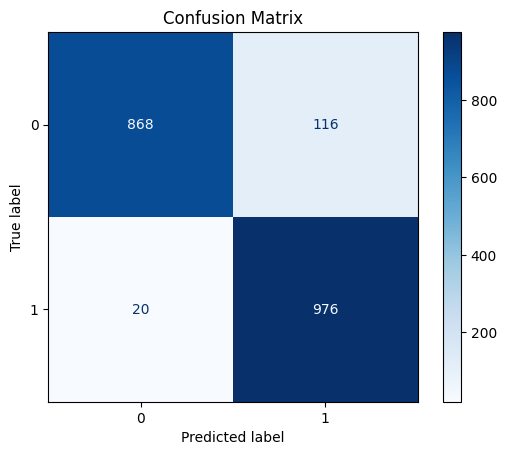

In [ ]:
# Evaluate the model
results = loaded_vit.evaluate(X_test, y_test, verbose=2)

# Extract loss and accuracy
loss = results[0]
accuracy = results[1]
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Predict and calculate confusion matrix
y_pred_probs = loaded_vit.predict(X_test)
y_pred_classes = y_pred_probs.argmax(axis=1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(set(y_test)))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


## Model Selection and Cross-validation
Cross-validation and model selection are pivotal components in ensuring the robustness of machine learning models. They ensure that our model doesn't just memorise the training data (overfitting) and that it generalises well to new, unseen data. However, they are some small nuances between this procedure in Deep Learning models (like CNN and ViT) and traditional Machine Learning models (Random Forests)

### Deep Learning Models:

- **Validation During Training**:
    - Deep learning models, particularly when trained on large datasets, often incorporate a validation set during the training process. This is done to monitor the model's generalization performance and to use mechanisms like early stopping, learning rate annealing based on validation loss, etc.

- **Cross-Validation Less Common**:
    - Due to the computational intensity and time required to train deep learning models, k-fold cross-validation is less commonly used. Instead, a single hold-out validation set (or sometimes a few different validation sets) is used.

- **Model Selection**:
    - While the principles of model selection apply to deep learning, the specific approach might be different. Hyperparameter tuning in deep learning might involve methods like random search, Bayesian optimization, or dedicated libraries like Optuna or Ray Tune, instead of just grid search.

### Traditional ML Models:

- **Cross-Validation**:
    - For many traditional machine learning models, k-fold cross-validation is a standard technique because these models are typically faster to train. Cross-validation gives a more robust estimate of the model's performance.

- **Model Selection**:
    - Grid search combined with cross-validation (e.g., `GridSearchCV` in scikit-learn) is a common method for hyperparameter tuning and model selection for traditional algorithms.

### Overlap & Best Practices:

- Despite these general trends, it's worth noting that there's overlap. Deep learning models can also be evaluated using cross-validation if computational resources permit. Similarly, traditional ML models can (and do) use validation sets during training, especially for iterative algorithms like gradient boosting machines.

- The choice between using a validation set during training or relying on cross-validation often depends on the dataset's size, computational resources, and specific project requirements.

- Actually we have included validation procedure in the building of CNN and ViT. Check for code that contains 'validation or validation split'.


### What is Cross-Validation? {cite}`bishop2006pattern`

Cross-validation is a technique to evaluate the performance of a model by splitting the dataset into a training set and a validation set multiple times. The most common method is k-fold cross-validation.
### K-Fold Cross-Validation {cite}`bishop2006pattern`

In k-fold cross-validation, the training data is randomly partitioned into k equal-sized subsets. Of the k subsets, a single subset is retained as validation data, and the remaining k-1 subsets are used as training data. The cross-validation process is repeated k times, with each of the k subsets used exactly once as validation data. The k results can then be averaged to produce a single estimation.

The following code is a example of K-Fold CV for Random Forest model:

In [ ]:
from sklearn.model_selection import cross_val_score
# Assuming `model` is your sklearn model and `X` and `y` are your data
# Perform 5-fold cross-validation
scores = cross_val_score(clf, X_reshaped, y_train, cv=5)

# Print the mean of the cross-validation scores
print("Mean cross-validation score: ", scores.mean())

## Model Selection

Model selection involves choosing the best model from a set of models based on performance. The model with the best cross-validation score is typically selected.

### Grid Search

A popular technique for model selection is grid search. Grid search involves:

- Specifying a subset of the hyperparameter space.
- Training a model for each hyperparameter combination.
- Evaluating each model using cross-validation.
- Selecting the model with the best cross-validation performance.


In [ ]:
from sklearn.model_selection import GridSearchCV

# Example for a hypothetical model's hyperparameters
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30]
}
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_reshaped, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)


Best parameters:  {'max_depth': 20, 'n_estimators': 100}
Best cross-validation score:  0.9832137432212003
